In [0]:
#all of my imports
import tensorflow as tf
tf.keras.__version__
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import errno
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
from google.colab import drive    #import google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def mkdir_errfree(value):   #creates the classes
  if not os.path.exists(value):
    try:
      os.makedirs(value)
    except OSError as e:
      if e.errno != errno.EEXIST:
        raise

In [0]:
DATADIR = '/content/drive/My Drive/Colab Notebooks/flower_photos/'
base = '/content/drive/My Drive/Colab Notebooks/flowers/data'
mkdir_errfree(base)
CATEGORIES = ['daisy','dandelion','roses','sunflowers','tulips']



In [0]:

train_datagen = ImageDataGenerator(rescale = 1./255)   #rescales all images by 1./255


val_datagen = ImageDataGenerator(rescale = 1./255)


test_datagen = ImageDataGenerator(rescale = 1./255)


train_dir = os.path.join(base, 'train') #creates the train directory
mkdir_errfree(train_dir)
validation_dir = os.path.join(base, 'validation') #creates the validation directory
mkdir_errfree(validation_dir)
test_dir = os.path.join(base, 'test') #creates the test directory
mkdir_errfree(test_dir)

train_dir_daisy = os.path.join(train_dir, 'daisy')   #creates the five classes of flower train_directory
mkdir_errfree(train_dir_daisy)
train_dir_dandelion = os.path.join(train_dir, 'dandelion')
mkdir_errfree(train_dir_dandelion)
train_dir_roses = os.path.join(train_dir, 'roses')
mkdir_errfree(train_dir_roses)
train_dir_sunflowers = os.path.join(train_dir, 'sunflowers')
mkdir_errfree(train_dir_sunflowers)
train_dir_tulips = os.path.join(train_dir, 'tulips')
mkdir_errfree(train_dir_tulips)
  
validation_dir_daisy = os.path.join(validation_dir, 'daisy') #creates the five classes of flower validation_directory
mkdir_errfree(validation_dir_daisy)
validation_dir_dandelion = os.path.join(validation_dir, 'dandelion')
mkdir_errfree(validation_dir_dandelion)
validation_dir_roses = os.path.join(validation_dir, 'roses')
mkdir_errfree(validation_dir_roses)
validation_dir_sunflowers = os.path.join(validation_dir, 'sunflower')
mkdir_errfree(validation_dir_sunflowers)
validation_dir_tulips = os.path.join(validation_dir, 'tulips')
mkdir_errfree(validation_dir_tulips)

test_dir_daisy = os.path.join(test_dir, 'daisy')   #creates the five classes of flower test_directory
mkdir_errfree(test_dir_daisy)
test_dir_dandelion = os.path.join(test_dir, 'dandelion')
mkdir_errfree(test_dir_dandelion)
test_dir_roses = os.path.join(test_dir, 'roses')
mkdir_errfree(test_dir_roses)
test_dir_sunflowers = os.path.join(test_dir, 'sunflower')
mkdir_errfree(test_dir_sunflowers)
test_dir_tulips = os.path.join(test_dir, 'tulips')
mkdir_errfree(test_dir_tulips)



In [42]:
test_flowers = 50
val_flowers = 50

for category in CATEGORIES:      #creates the source and destination
    src = os.path.join(DATADIR,category)
    current_test = 0   #test counter
    current_val = 0    #validation counter
    for img in (os.listdir(src)):  #copies files into train,validation, and test folders
          path = os.path.join(src,img)
          if current_test < test_flowers:
            current_test +=1
            dst = os.path.join(test_dir,img)
          elif current_val < val_flowers:
            current_val +=1
            dst = os.path.join(validation_dir,img) 
          else:
            os.path.join(src,img)
            dst = os.path.join(train_dir,img)


print("Train: ") #creates categorical train generator
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'categorical')
print("Validation: ") #creates categorical validation generator
validation_generator = val_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'categorical')
print("Test: ")   #creates categorical test generator
test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Train: 
Found 3170 images belonging to 5 classes.
Validation: 
Found 250 images belonging to 5 classes.
Test: 
Found 250 images belonging to 5 classes.


In [43]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()  #creates the model and train it in a convolutional neural network
model.add(layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(5,activation = 'softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

In [44]:

model.compile(loss='categorical_crossentropy',  #compiling the model
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit_generator(train_generator,steps_per_epoch = 100, epochs = 10, validation_data = validation_generator, validation_steps = 50)
#uses fit generator

Epoch 1/10
100/100 [==============================] - 548s 5s/step - loss: 1.3137 - acc: 0.4271 - val_loss: 1.2234 - val_acc: 0.4454
Epoch 2/10
100/100 [==============================] - 279s 3s/step - loss: 1.0709 - acc: 0.5462 - val_loss: 0.9412 - val_acc: 0.6567
Epoch 3/10
100/100 [==============================] - 122s 1s/step - loss: 0.9371 - acc: 0.6405 - val_loss: 0.8822 - val_acc: 0.6216
Epoch 4/10
100/100 [==============================] - 122s 1s/step - loss: 0.8208 - acc: 0.6815 - val_loss: 0.8951 - val_acc: 0.6485
Epoch 5/10
100/100 [==============================] - 121s 1s/step - loss: 0.7721 - acc: 0.6995 - val_loss: 0.8190 - val_acc: 0.6825
Epoch 6/10
100/100 [==============================] - 122s 1s/step - loss: 0.7090 - acc: 0.7246 - val_loss: 0.8615 - val_acc: 0.6742
Epoch 7/10
100/100 [==============================] - 122s 1s/step - loss: 0.6656 - acc: 0.7332 - val_loss: 0.8200 - val_acc: 0.6938
Epoch 8/10
100/100 [==============================] - 123s 1s/step - 

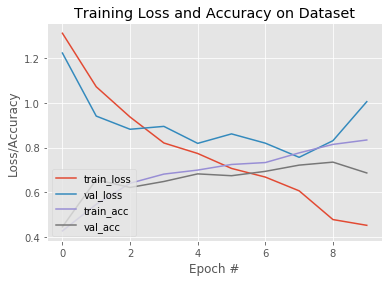

In [45]:
N = 10  #use matplotlib to plot acc, loss, val_loss, and val_acc
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")  #plots loss
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss") #plots val_loss
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc") #plots acc
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc") #plots val_acc
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left") #creates the key

In [46]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top=False, input_shape = (150,150,3))
conv_base.summary()



58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [47]:
conv_base.compile(loss='categorical_crossentropy',  #compiling the model
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit_generator(train_generator,steps_per_epoch = 100, epochs = 10, validation_data = validation_generator, validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 121s 1s/step - loss: 0.3542 - acc: 0.8683 - val_loss: 0.9575 - val_acc: 0.6990
Epoch 2/10
100/100 [==============================] - 121s 1s/step - loss: 0.2970 - acc: 0.8870 - val_loss: 1.0312 - val_acc: 0.7103
Epoch 3/10
100/100 [==============================] - 120s 1s/step - loss: 0.2490 - acc: 0.9155 - val_loss: 1.1842 - val_acc: 0.6804
Epoch 4/10
100/100 [==============================] - 120s 1s/step - loss: 0.1405 - acc: 0.9490 - val_loss: 1.5303 - val_acc: 0.6753
Epoch 5/10
100/100 [==============================] - 121s 1s/step - loss: 0.1831 - acc: 0.9395 - val_loss: 1.3072 - val_acc: 0.6701
Epoch 6/10
100/100 [==============================] - 120s 1s/step - loss: 0.1134 - acc: 0.9628 - val_loss: 1.3717 - val_acc: 0.7237
Epoch 7/10
100/100 [==============================] - 121s 1s/step - loss: 0.0754 - acc: 0.9710 - val_loss: 1.6125 - val_acc: 0.6918
Epoch 8/10
100/100 [==============================] - 121s 1s/step - 

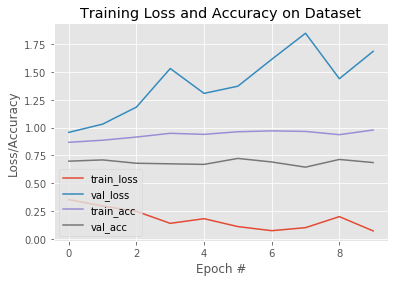

In [48]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,  #Task 4 Data Augmentation
                                  width_shift_range=[-.1,.1],  #allow the training images to shift the range of its width
                                  rotation_range=90,   #allows the images to adjust its rotations
                                  height_shift_range=0.05,   #allows the images to adjust its height shift
                                  horizontal_flip=True)    #allows the image to flip the image 

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'categorical')

model.compile(loss='categorical_crossentropy',  #compiling the model
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit_generator(train_generator,steps_per_epoch = 100, epochs = 10, validation_data = validation_generator, validation_steps = 50)

Found 3170 images belonging to 5 classes.
Epoch 1/10
100/100 [==============================] - 130s 1s/step - loss: 0.9619 - acc: 0.6548 - val_loss: 0.7752 - val_acc: 0.7062
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 0.7836 - acc: 0.6890 - val_loss: 0.7978 - val_acc: 0.7144
Epoch 3/10
100/100 [==============================] - 128s 1s/step - loss: 0.7217 - acc: 0.7101 - val_loss: 0.8271 - val_acc: 0.7155
Epoch 4/10
100/100 [==============================] - 128s 1s/step - loss: 0.7258 - acc: 0.6995 - val_loss: 0.7489 - val_acc: 0.7320
Epoch 5/10
100/100 [==============================] - 128s 1s/step - loss: 0.7071 - acc: 0.7221 - val_loss: 0.7660 - val_acc: 0.7258
Epoch 6/10
100/100 [==============================] - 129s 1s/step - loss: 0.6803 - acc: 0.7372 - val_loss: 0.7359 - val_acc: 0.7041
Epoch 7/10
100/100 [==============================] - 129s 1s/step - loss: 0.6877 - acc: 0.7226 - val_loss: 0.7821 - val_acc: 0.7103
Epoch 8/10
100/100 [=======